In [2]:
import json
import datetime
import dateutil
import pytz
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import csv
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
from datetime import datetime
from datetime import timedelta
import dateutil.parser


nltk.download('wordnet')

stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 3:
            result.append(lemmatize_stemming(token))
    return result
            
def count_words(data, word):
    w=lemmatize_stemming(word)
    counter=0
    counter_comment=0
    for video in data:
        for comment in video["comment_list"]:
            if comment is not None:
                counter_comment+=1
                words=preprocess(comment["text"])
                counter+=words.count(w)
    
    if counter_comment==0:
        return 0
    else:
        return counter/counter_comment
    
#     for comment in comments:
#         words=preprocess(comment)
        
youtuber_list_path="subscriber_network.json"

data=[]
category_list={}
with open(youtuber_list_path,'r') as fp:
    youtubers=json.loads(fp.read())["nodes"]
    for you in youtubers:
        net_st="outsider"
        data.append({
            "subscriber_category":"monetizable" if you["subscriber_count"]>=10000 else "non-monetizable",
            "video_count": "retention" if len(you["video_list"])>1 else "non-retention",
            "view_count": sum([v["view_count"] for v in you["video_list"]]),
            "like_count": sum([v["like_count"] for v in you["video_list"]]),
            "dislike_count": sum([v["dislike_count"] for v in you["video_list"]]),
            "comment_count": sum([v["comment_count"] for v in you["video_list"]]),
            "video_ids": [v["video_id"] for v in you["video_list"]],
            "trees": count_words(you["video_list"], "trees")
        })

youtuber_save_path="youtuber_data.csv"
with open(youtuber_save_path, mode='w+', encoding="utf-8", newline='') as fp:
    csv_writer = csv.writer(fp, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    first = True
    for v in data:
        if first:
            csv_writer.writerow([key for key, value in v.items()])
            first = False
        csv_writer.writerow([value for key, value in v.items()])
        

# video=[v["videos"] for v in data]
# video.sort()
# video=sorted(data, key=lambda x: x["video_count"], reverse=True)
# print(json.dumps(video, indent=4))
# plt.figure(figsize=(20,16))
# plt.xticks(rotation=90)
# plt.bar(np.arange(video), video)
# plt.plot(np.arange(len(x)),x)
# plt.scatter([d["subscriber_count"] for d in data],[d["video_count"] for d in data],s=100)
# plt.show()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shoen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
youtuber_list_path="subscriber_network.json"

def rating(video):
    if video["like_count"]+video["dislike_count"] == 0:
        return 0
    else: 
        return video["like_count"]/(video["like_count"]+video["dislike_count"])

    
def top_comments(comments, num):
    com=sorted(comments, reverse=True, key=lambda x:x["like"])
    return com[0:num]
    
data=[]
category_list={}

with open(youtuber_list_path,'r') as fp:
    youtubers=json.loads(fp.read())["nodes"]  
    youtubers=sorted(youtubers, reverse=True, key=lambda x:rating(x["video_list"][0]))   
    for you in youtubers:
        if you["subscriber_count"]<10000:
            continue
        for vi in you["video_list"]:
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print("https://www.youtube.com/watch?v="+vi["video_id"])
            print(you["channel_name"])
            print(you["category"])
            print("SUBSCRIBER#: "+str(you["subscriber_count"]))
            print("RATING: "+ str(rating(vi)))
            print("TIME: "+ str(rating(vi)))
            print("VIEW#: "+ str(vi["view_count"]))
            print("TITLE: "+vi["title"])
            print(vi["tags"])
            print(vi["description"])
            print(json.dumps(top_comments(vi["comment_list"],5),indent=4))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
https://www.youtube.com/watch?v=gfwX5niNBdY
Beauty and the Bolt
[]
SUBSCRIBER#: 13700
RATING: 1.0
TIME: 1.0
VIEW#: 890
TITLE: RECLAIMED WOOD Toolbox/Planter for #TeamTrees
['diy', 'project', 'tutorial', 'makerspace', '#teamtrees', 'team trees', 'teamtrees', '20 million trees', 'planting 20 million trees', 'reclaimed', 'wood', 'toolbox', 'fall', 'craft', 'autumn', 'planter', 'houseplanter', 'cute plant ideas', 'planter box diy', 'eco friendly', 'sustainable living', 'crafts', 'woodworking', 'do it yourself', 'diy projects']
DONATE: https://teamtrees.org/

I can't believe it took me this long to make my first fully reclaimed wood project. I promise there will be many more to come. I didn't publish plans for this since it's based on the random sized piece of wood I found, but let me know if you want plans in the comments! 


]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
https://www.youtube.com/watch?v=vkx1N3zhdew
Kati Morton
[]
SUBSCRIBER#: 834000
RATING: 0.9720087815587267
TIME: 0.9720087815587267
VIEW#: 33424
TITLE: You've Been Breathing Wrong #teamtrees | Kati Morton
['kati morton', 'breathing exercises', 'calm anxiety down', 'anxious', 'belly breathing', 'how to breath', 'breathing properly', 'catch your breath', 'calm', 'team trees', 'teamtrees', 'anxiety', 'panic attack', 'Katie morton', 'psychology', 'therapist', 'mental health', 'Mr beast', 'mark rober']
Hit that donate button or head to www.teamtrees.org now! 
There are 2 types of breathing: chest breathing, and abdominal (or diaphragmatic) breathing. Chest breathing is meant to be used in times of great exertion, like a sprint or an emergency situation. It uses the secondary muscles in our chest to pull our chest (and usuall

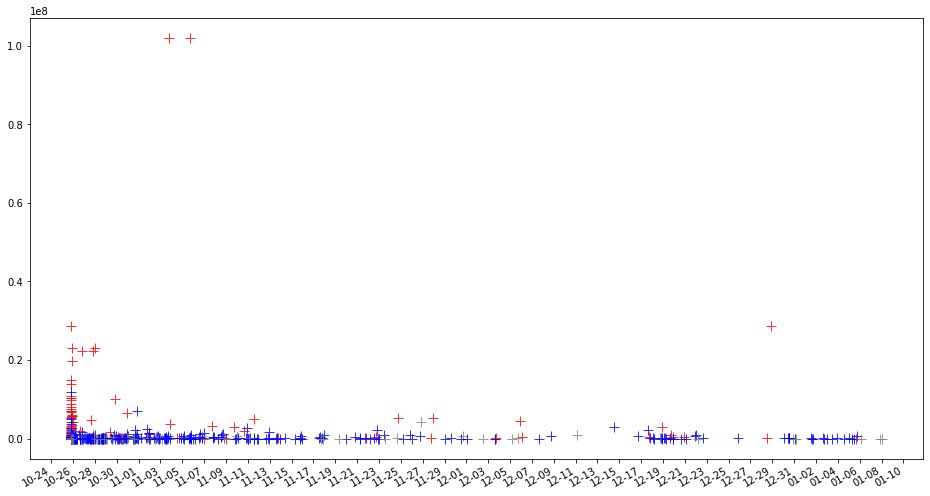

In [2]:
import json
import datetime
import dateutil
import pytz
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import csv
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
from datetime import datetime
from datetime import timedelta
import dateutil.parser
youtuber_list_path="subscriber_network.json"

raw_data={}
with open(youtuber_list_path, 'r') as fp:
    data=json.loads(fp.read())["nodes"]
    for d in data:
        raw_data[d["channel_id"]]=d

youtubers=[]
videos=[]
def get_network_tag(follower_list, following_list):
        if len(follower_list)==0 and len(following_list)==0:
            return "non_connect"
        elif len(follower_list)>len(following_list):
            return "influencer"
        else:
            return "follower"
            


with open(youtuber_list_path, 'r') as fp:
    data=json.loads(fp.read())["nodes"]
    for you in data:
        following_list=set(you["network_subscriptions"]).union(set(you["network_tag_mentioning"])).union(set(you["network_caption_mentioning"])).union(set(you["network_description_mentioning"]))
        follower_list=set(you["network_subscribers"]).union(set(you["network_tag_mentioners"])).union(set(you["network_caption_mentioners"])).union(set(you["network_description_mentioners"]))
        for vi in you["video_list"]:
            youtubers.append({
                "channel_name":you["channel_name"],
                "network": get_network_tag(follower_list, following_list),
                "channel_id":you["channel_id"],
                "time":dateutil.parser.parse(vi["publish_at"]),
                "index":math.log(you["subscriber_count"],2) if you["subscriber_count"]!=0 else 0,
                "video_count":len(you["video_list"]),
                "video_view_count":math.log(vi["view_count"],2) if vi["view_count"]!=0 else 0,
                "subscriber_count":you["subscriber_count"],
                "follower_list":follower_list,
                "following_list":following_list,
            })

    
# print(youtubers)
youtubers=sorted(youtubers, key= lambda x:len(x["follower_list"]), reverse=True)

fig, ax = plt.subplots(figsize=(16, 9))
# Format the x axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
for you in youtubers:
    co = "grey" 
    if you["network"]=="influencer":
        co="red"
    if you["network"]=="follower":
        co="blue"
    ax.plot(you["time"],you["subscriber_count"], marker='+', markersize=10, c=co, alpha=.8)


fig.autofmt_xdate()
plt.show()


youtuber_save_path="youtuber_data.csv"
with open(youtuber_save_path, mode='w+', encoding="utf-8", newline='') as fp:
    csv_writer = csv.writer(fp, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    first = True
    for v in youtubers:
        if first:
            csv_writer.writerow([key for key, value in v.items()])
            first = False
        csv_writer.writerow([value for key, value in v.items()])

In [1]:
def get_network_tag(follower_list, following_list):
        if len(follower_list)==0 and len(following_list)==0:
            return "non_connect"
        elif len(follower_list)>len(following_list):
            return "influencer"
        else:
            return "follower"
            
data={}            
with open(youtuber_list_path, 'r') as fp:
    data=json.loads(fp.read())
    for you in data["nodes"]:
        following_list=set(you["network_subscriptions"]).union(set(you["network_tag_mentioning"])).union(set(you["network_caption_mentioning"])).union(set(you["network_description_mentioning"]))
        follower_list=set(you["network_subscribers"]).union(set(you["network_tag_mentioners"])).union(set(you["network_caption_mentioners"])).union(set(you["network_description_mentioners"]))
        you["network"]=get_network_tag(follower_list, following_list)

with open("subscriber_network_viz.json", 'w+') as fp:
    fp.write(json.dumps(data, indent=4))

NameError: name 'youtuber_list_path' is not defined

In [6]:
import json
import datetime
import dateutil
import pytz
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import csv
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
from datetime import datetime
from datetime import timedelta
import dateutil.parser

data=[]

def get_network_tag(follower_list, following_list):
        if len(follower_list)==0 and len(following_list)==0:
            return "non_connect"
        elif len(follower_list)>len(following_list):
            return "influencer"
        else:
            return "follower"
    
def get_first_video_time(video_list):
    fir_vi = min(video_list, key=lambda x: dateutil.parser.parse(x["publish_at"]))
    return dateutil.parser.parse(fir_vi["publish_at"])
    
youtuber_list_path="subscriber_network.json"

with open(youtuber_list_path, 'r') as fp:
    raw_data=json.loads(fp.read())["nodes"]
    counter=0
    for you in raw_data:
        following_list=set(you["network_subscriptions"]).union(set(you["network_tag_mentioning"])).union(set(you["network_caption_mentioning"])).union(set(you["network_description_mentioning"]))
        follower_list=set(you["network_subscribers"]).union(set(you["network_tag_mentioners"])).union(set(you["network_caption_mentioners"])).union(set(you["network_description_mentioners"]))
        for vi in you["video_list"]:
            if vi["video_id"]=="3fGlvusJsrI":
                print(vi["caption"])
            data.append({
                    "channel_name":you["channel_name"],
                    "network": get_network_tag(follower_list, following_list),
                    "channel_id":you["channel_id"],
                    "index":math.log(you["subscriber_count"],2),
                    "video_count":len(you["video_list"]),
                    "subscriber_count":you["subscriber_count"],
                    "network_follower_count":len(follower_list),
                    "network_following_count":len(following_list),
                    "network_follower_list":follower_list,
                    "network_following_list":following_list,
                    "first_video":get_first_video_time(you["video_list"]),
                    "first_video_since":(get_first_video_time(you["video_list"])-datetime(2019,10,25,0,0,0,0,pytz.UTC)).days,
                    "network_subscribers_count":len(you["network_subscribers"]),
                    "network_tag_mentioners_count":len(you["network_tag_mentioners"]),
                    "network_caption_mentioners_count":len(you["network_caption_mentioners"]),
                    "network_description_mentioners_count":len(you["network_description_mentioners"]),
                    "video_id":vi["video_id"],
                    "video_view_count":vi["view_count"],
                    "video_like_count":vi["like_count"],
                    "video_dislike_count":vi["dislike_count"],
                    "video_comment_count":len(vi["comment_list"]),
                    "video_url":"https://www.youtube.com/watch?v="+vi["video_id"]
                })

data=sorted(data, key= lambda x:x["channel_name"], reverse=False)
save_path="video_data.csv"
with open(save_path, mode='w+', encoding="utf-8", newline='') as fp:
    csv_writer = csv.writer(fp, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    first = True
    for v in data:
        if first:
            csv_writer.writerow([key for key, value in v.items()])
            first = False
        csv_writer.writerow([value for key, value in v.items()])

hey we've got a really great episode for you but before we get to that I really want to talk to you about the team trees initiative here on YouTube it was started by mr. beast hey mr. beast here today we're gonna buy every item in this store mark Rober if anyone was going to make a revenge pay package and over-engineered the crap out of it it was going to be me it's smarter every day hey it's me Destin welcome back to smarter every day with the goal of raising twenty million dollars to plant 20 million trees before January 1st 2020 everything you need to know is in a link down in the description we do have a really cool episode coming up where we work with a really awesome creator and I can't wait for you to see it but for now let's get on with the show hey it's Joel recently we attended the East Coast RepRap Festival affectionately known as Earth a sound you make when you step on Lego it was a wonderful event and what was really cool is we got to design this this is called a Mike flag